In [29]:
# export full genome
from pybedtools import genome_registry, chromsizes_to_file, chromsizes
chromsizes_to_file(chromsizes('hg19'), '../download/genome/hg19.genome')

'../download/genome/hg19.genome'

In [30]:
assembly_path = "../download/genome/hg19_reduced.genome"

In [31]:
import pandas as pd
import numpy as np
from pybedtools import BedTool

In [32]:
store = pd.HDFStore("../storage/encode_overlaps.hdf")
store_repeat = pd.HDFStore("../storage/repeatmasker_staging.hdf")

In [33]:
store.keys()

['/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped',
 '/filtered_hg19_DNase_H3K27ac_FANTOM_overlapped_bed']

In [34]:
store_repeat.keys()

['/DNA',
 '/DNA_Kolobok',
 '/DNA_Kolobok_bed',
 '/DNA_MULE_MuDR',
 '/DNA_MULE_MuDR_bed',
 '/DNA_Merlin',
 '/DNA_Merlin_bed',
 '/DNA_PIF_Harbinger',
 '/DNA_PIF_Harbinger_bed',
 '/DNA_PiggyBac',
 '/DNA_PiggyBac_bed',
 '/DNA_TcMar',
 '/DNA_TcMar_Mariner',
 '/DNA_TcMar_Mariner_bed',
 '/DNA_TcMar_Pogo',
 '/DNA_TcMar_Pogo_bed',
 '/DNA_TcMar_Tc1',
 '/DNA_TcMar_Tc1_bed',
 '/DNA_TcMar_Tc2',
 '/DNA_TcMar_Tc2_bed',
 '/DNA_TcMar_Tigger',
 '/DNA_TcMar_Tigger_bed',
 '/DNA_TcMar_bed',
 '/DNA_TcMar_qm',
 '/DNA_TcMar_qm_bed',
 '/DNA_bed',
 '/DNA_hAT',
 '/DNA_hAT_Ac',
 '/DNA_hAT_Ac_bed',
 '/DNA_hAT_Blackjack',
 '/DNA_hAT_Blackjack_bed',
 '/DNA_hAT_Charlie',
 '/DNA_hAT_Charlie_bed',
 '/DNA_hAT_Tag1',
 '/DNA_hAT_Tag1_bed',
 '/DNA_hAT_Tip100',
 '/DNA_hAT_Tip100_bed',
 '/DNA_hAT_Tip100_qm',
 '/DNA_hAT_Tip100_qm_bed',
 '/DNA_hAT_bed',
 '/DNA_hAT_qm',
 '/DNA_hAT_qm_bed',
 '/DNA_qm',
 '/DNA_qm_PiggyBac_qm',
 '/DNA_qm_PiggyBac_qm_bed',
 '/DNA_qm_bed',
 '/DNA_qm_hAT_Tip100_qm',
 '/DNA_qm_hAT_Tip100_qm_bed',
 '/L

In [35]:
store.close()
store_repeat.close()

In [36]:
encode_metadata = pd.read_hdf("../storage/encode_staging.hdf", "encode_metadata")

In [37]:
encode_metadata.query("assembly == 'hg19' & biosample_type=='immortalized cell line' & method=='DNase_H3K27ac'")['biosample_term_name'].unique()

array(['K562', 'HeLa-S3', 'HCT116', 'HepG2', 'MCF-7', 'GM12878', 'Panc1'], dtype=object)

In [38]:
encode_metadata.query("assembly == 'hg19' & method=='DNase_H3K27ac' & biosample_term_name=='K562'")

,accession,assembly,biosample_term_id,biosample_term_name,biosample_type,description,developmental_slims,encyclopedia_version,month_released,organ_slims,organism,system_slims,bed_filename,bed_filepath,merged,method
50,ENCSR083ZZU,hg19,EFO:0002067,K562,immortalized cell line,Enhancer-like regions using DNase and H3K27ac ...,[],3,"June, 2016",[],/organisms/human/,[],ENCFF687ZGE.bed.gz,/Users/manuel/development/thesis/download/ENCO...,False,DNase_H3K27ac


In [39]:
encode_bed = BedTool("../download/ENCODE/ENCSR083ZZU/files/ENCFF687ZGE/ENCFF687ZGE.bed.gz")

In [40]:
repeat_bed_df = pd.read_hdf("../storage/repeatmasker_staging.hdf", "SINE_MIR_bed")
repeat_bed = BedTool().from_dataframe(repeat_bed_df)

In [41]:
encode_bed.head()

chr1	31239873	31243394	Distal-Prediction-1	1	.	31241920	31242070	255,205,0
 chr4	10179984	10189724	Distal-Prediction-2	1	.	10182940	10183090	255,205,0
 chr1	145007837	145010711	Distal-Prediction-3	1	.	145009560	145009710	255,205,0
 chr16	70460661	70465611	Distal-Prediction-4	1	.	70462120	70462270	255,205,0
 chr10	74078831	74083775	Distal-Prediction-5	1	.	74080580	74080730	255,205,0
 chr1	207192997	207199938	Distal-Prediction-6	1	.	207197800	207197950	255,205,0
 chr1	145454000	145457861	Distal-Prediction-7	1	.	145455440	145455590	255,205,0
 chr1	26447785	26455587	Distal-Prediction-8	1	.	26452900	26453050	255,205,0
 chr7	106206757	106212313	Distal-Prediction-9	1	.	106209520	106209670	255,205,0
 chr1	31249026	31252753	Distal-Prediction-10	1	.	31251340	31251490	255,205,0
 

In [42]:
encode_bed.count()

36772

In [43]:
repeat_bed.count()

594372

In [44]:
repeat_bed = repeat_bed.merge()
repeat_bed.count()

586819

In [45]:
encode_bed_df = encode_bed.to_dataframe()

## MIR-enhancers: core of enhancers in MIR

In [46]:
def compute_centers(df):
    df['centered_locus'] = round(
        (df['end'] - df['start'])/2 
        + df['start']).astype(int)

In [47]:
compute_centers(encode_bed_df)

In [48]:
encode_bed_cores_df = encode_bed_df.copy()
encode_bed_cores_df['start'] = encode_bed_cores_df['centered_locus']
encode_bed_cores_df['end'] = encode_bed_cores_df['centered_locus']

In [49]:
encode_bed_cores = BedTool().from_dataframe(encode_bed_cores_df[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [50]:
encode_bed_cores.count()

36772

In [51]:
#MIR-enhancers: core of enhancer in MIR
core_intersection = encode_bed_cores.intersect(repeat_bed)

In [52]:
core_intersection.count()

1024

In [53]:
core_intersection.head()

chr1	31241634	31241634	Distal-Prediction-1	1	.
 chr10	74081303	74081303	Distal-Prediction-5	1	.
 chr1	117046626	117046626	Distal-Prediction-71	1	.
 chr3	177076814	177076814	Distal-Prediction-94	1	.
 chr2	100908420	100908420	Distal-Prediction-156	1	.
 chr20	354090	354090	Distal-Prediction-161	1	.
 chr1	31643657	31643657	Distal-Prediction-172	1	.
 chr1	59349875	59349875	Distal-Prediction-180	1	.
 chr6	158462286	158462286	Distal-Prediction-255	1	.
 chr3	195854460	195854460	Distal-Prediction-265	1	.
 

In [56]:
# null model MIR-enhancers
shuffled_encode_bed_cores = encode_bed_cores.shuffle(g=assembly_path)
core_null_model_intersection = shuffled_encode_bed_cores.intersect(repeat_bed)

In [57]:
core_null_model_intersection.count()

992

In [151]:
def compute_size(row, prefix=None):
    col_name = prefix + '_name' if prefix else 'name'
    if row[col_name] == '.':
        return 0
    col_end = prefix + '_end' if prefix else 'end'
    col_start = prefix + '_start' if prefix else 'start'
    size = abs(row[col_end] - row[col_start])
    return size

def mean_size(bed):
    sample_df = bed.to_dataframe()
    sample_df['size'] = sample_df.apply(lambda row: compute_size(row), axis=1)
    return int(round(sample_df[['size']].mean()))

def build_random_overlap(bed, intervals_size, intervals_num, min_overlap, assembly, df_columns, idx):
    empty_bed = BedTool()
    random_bed = empty_bed.random(l=intervals_size, n=intervals_num,
                                  g=assembly)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

def build_shuffled_overlap(bed, bed_overlap_with, min_overlap, assembly, df_columns, idx):
    random_bed = bed_overlap_with.shuffle(g=assembly, chrom=False)
    row_array = [idx, bed.intersect(random_bed, f=min_overlap).count()]
    return pd.DataFrame([row_array], columns=df_columns)

In [152]:
from joblib import Parallel, delayed
import multiprocessing

def create_random_overlap_distribution_parallelized(bed, bed_overlap_with, assembly, min_overlap, 
                                                    samples_num,strategy='random'):
    num_cores = multiprocessing.cpu_count()

    intervals_size = mean_size(bed_overlap_with)
    intervals_num = bed_overlap_with.count()
    columns = ['sample_num', 'size']

    if strategy == 'shuffle':
        df_list = Parallel(n_jobs=num_cores)(delayed(build_shuffled_overlap)
                                             (bed, bed_overlap_with, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    else:
        df_list = Parallel(n_jobs=num_cores)(delayed(build_random_overlap)
                                             (bed, intervals_size, intervals_num, min_overlap, assembly, columns, i)
                                             for i in range(0, samples_num))
    return pd.concat(df_list)

In [153]:
test_df = create_random_overlap_distribution_parallelized(encode_bed_cores, repeat_bed, assembly_path,
                                                         1e-09, 100)

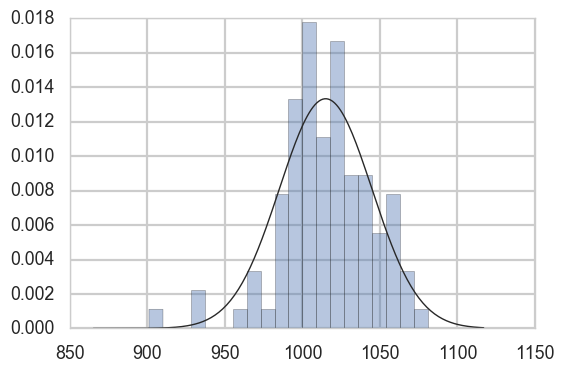

In [154]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df[['size']], kde=False, fit=st.norm, bins=20)

In [155]:
z_score =(core_intersection.count() - np.mean(test_df['size']))/np.std(test_df['size'])
print(z_score)

0.3350103513879747


In [156]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

0.63119136114958585

In [157]:
p_values = st.norm.sf(abs(z_score))
p_values

0.36880863885041415

In [158]:
st.ttest_1samp(a= test_df[['size']], popmean= core_intersection.count())

Ttest_1sampResult(statistic=array([-3.33331091]), pvalue=array([ 0.00120809]))

In [159]:
st.ttest_1samp(a= test_df[['size']], popmean= np.mean(test_df[['size']]))

Ttest_1sampResult(statistic=size    0.0
dtype: float64, pvalue=array([ 1.]))

In [160]:
chi2, p = st.chisquare( test_df[['size']],core_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 97.07121951]
p-value: [ 0.53605303]


In [161]:
encode_bed_cores.sort().fisher(repeat_bed.sort(), f=1e-09, g=assembly_path)

<FisherOutput at 5065322336>
# Number of query intervals: 36772
# Number of db intervals: 593104
# Number of overlaps: 1025
# Number of possible intervals (estimated): 21123744
# phyper(1025 - 1, 36772, 21123744 - 36772, 593104, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 1025         | 35747        |
# not in -a | 592079       | 20494893     |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
0.4147	0.5976	0.82497	0.993

In [162]:
1-st.hypergeom.cdf(975, 21123880 - 33082, 33082, 593161)

0.067519672328844149

In [163]:
df_reldist = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,709.000,709.000,824.000,811.000,814.000,785.000,786.000,809.000,751.00,802.000,...,716.000,669.000,707.000,674.000,729.00,714.000,724.00,713.000,695.000,4.0
fraction,0.019,0.019,0.022,0.022,0.022,0.021,0.021,0.022,0.02,0.022,...,0.019,0.018,0.019,0.018,0.02,0.019,0.02,0.019,0.019,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.08,0.090,...,0.410,0.420,0.430,0.440,0.45,0.460,0.47,0.480,0.490,0.5
total,36768.000,36768.000,36768.000,36768.000,36768.000,36768.000,36768.000,36768.000,36768.00,36768.000,...,36768.000,36768.000,36768.000,36768.000,36768.00,36768.000,36768.00,36768.000,36768.000,36768.0


In [164]:
df_reldist_random = pd.DataFrame(encode_bed_cores.sort().reldist(repeat_bed.shuffle(g=assembly_path, chrom=False).sort()))

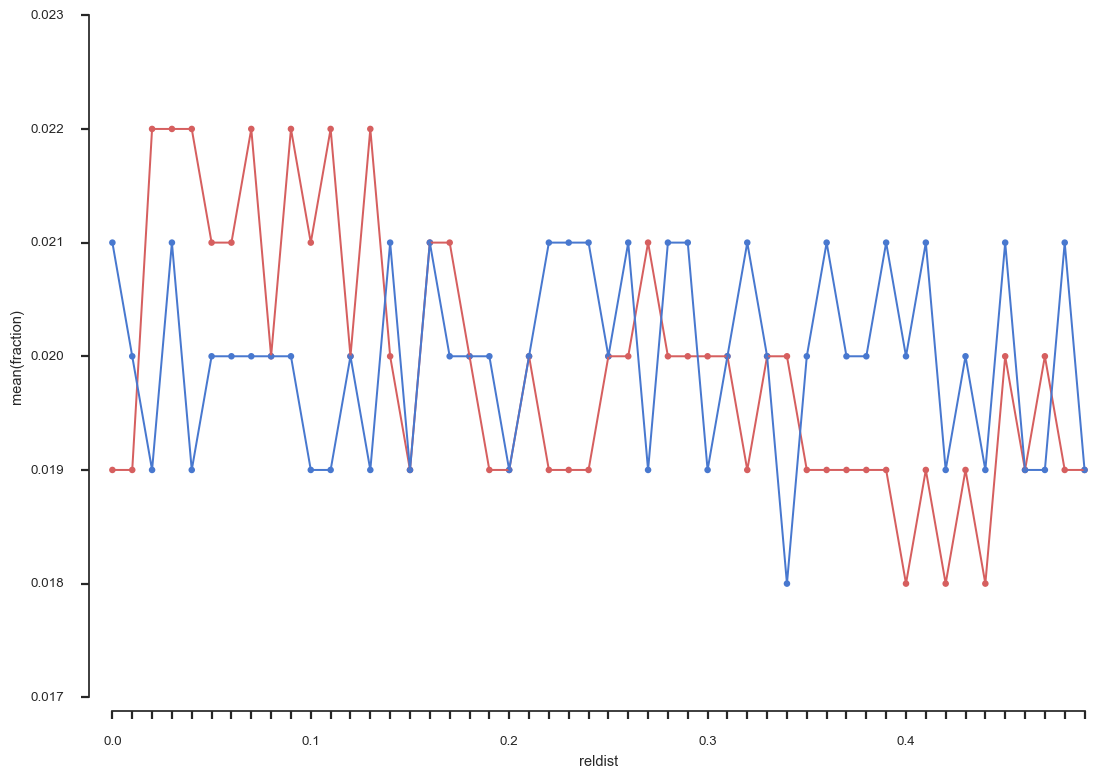

In [165]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Enhancer-MIRs: MIRs in a +/- 4 kbp window around enhancer's core 

In [166]:
encode_bed_df = encode_bed.to_dataframe()
encode_bed_df['size'] = encode_bed_df.apply(lambda row: compute_size(row), axis=1)

In [167]:
encode_bed_df['size'].quantile(0.5) == encode_bed_df['size'].median()

True

In [168]:
encode_bed_df['size'].std()

1304.5190614783264

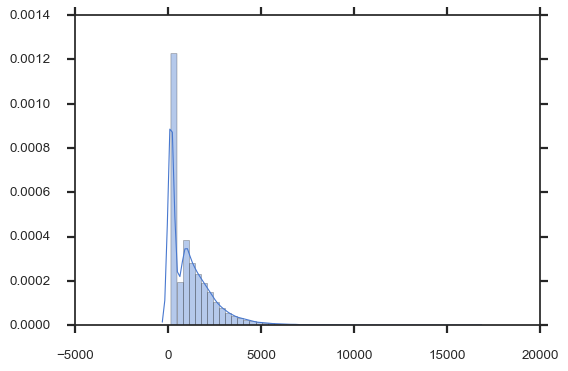

In [169]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(encode_bed_df[['size']], kde=True)

In [170]:
np.percentile(encode_bed_df[['size']], 50)

892.0

In [171]:
np.arange(0, 1, 0.1)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9])

In [172]:
encode_bed_df[['size']].quantile(np.arange(0,1,0.1))

,size
0.0,150.0
0.1,150.0
0.2,150.0
0.3,150.0
0.4,485.4
0.5,892.0
0.6,1169.0
0.7,1538.0
0.8,2020.0
0.9,2784.0


In [173]:
# what if using percentiles in considering enhancer regions? Eg: b=170/2, 251/2, ..., 3123/2
#encode_bed_slop = encode_bed_cores.slop(genome='hg19', b=int(round(3123/2)))

In [174]:
#compute "enhancers regions" as +/- 4kb from enhancer cores
encode_bed_slop = encode_bed_cores.slop(g=assembly_path, b=4000)

In [175]:
encode_bed_cores.sort().head()

chr1	115675	115675	Distal-Prediction-9604	1	.
 chr1	235802	235802	Proximal-Prediction-10601	1	.
 chr1	564555	564555	Proximal-Prediction-9553	1	.
 chr1	565355	565355	Proximal-Prediction-7646	1	.
 chr1	565935	565935	Proximal-Prediction-6508	1	.
 chr1	566515	566515	Proximal-Prediction-8593	1	.
 chr1	566835	566835	Proximal-Prediction-5360	1	.
 chr1	567635	567635	Proximal-Prediction-5084	1	.
 chr1	568395	568395	Proximal-Prediction-4563	1	.
 chr1	569855	569855	Proximal-Prediction-4978	1	.
 

In [176]:
encode_bed_slop.sort().head()

chr1	111675	119675	Distal-Prediction-9604	1	.
 chr1	231802	239802	Proximal-Prediction-10601	1	.
 chr1	560555	568555	Proximal-Prediction-9553	1	.
 chr1	561355	569355	Proximal-Prediction-7646	1	.
 chr1	561935	569935	Proximal-Prediction-6508	1	.
 chr1	562515	570515	Proximal-Prediction-8593	1	.
 chr1	562835	570835	Proximal-Prediction-5360	1	.
 chr1	563635	571635	Proximal-Prediction-5084	1	.
 chr1	564395	572395	Proximal-Prediction-4563	1	.
 chr1	565855	573855	Proximal-Prediction-4978	1	.
 

In [177]:
encode_bed_slop.count()

36772

In [178]:
#enhancer-MIRs: MIR in +/- 4kb from the core of an enhancer 
#(asking the full MIR to be overlapped by an enhancer region)
region_intersection = repeat_bed.intersect(encode_bed_slop, f=1)

In [179]:
region_intersection.count()

75502

In [180]:
# null model enhancers-MIRs
shuffled_repeat = repeat_bed.shuffle(g=assembly_path)

In [181]:
shuffled_repeat.count() == repeat_bed.count()

True

In [182]:
null_model_intersection = shuffled_repeat.intersect(encode_bed_slop, f=1)

In [183]:
null_model_intersection.count()

55523

In [184]:
test_df2 = create_random_overlap_distribution_parallelized(repeat_bed, encode_bed_slop, assembly_path,
                                                         1, 100)


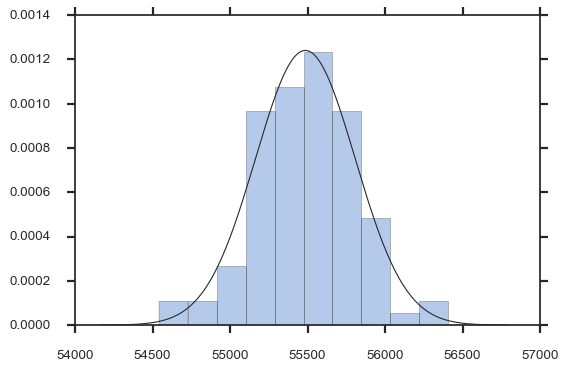

In [185]:
import seaborn as sns
%matplotlib inline
import scipy.stats as st
sns.distplot(test_df2[['size']], kde=False, fit=st.norm, bins=10)

In [186]:
z_score =(region_intersection.count() - np.mean(test_df2['size']))/np.std(test_df2['size'])
print(z_score)

62.24016170348942


In [187]:
import scipy.stats as st
st.norm.ppf(.95)
st.norm.cdf(z_score)

1.0

In [188]:
p_values = st.norm.sf(abs(z_score))
p_values

0.0

In [189]:
st.ttest_1samp(a= test_df2[['size']], popmean= region_intersection.count())

Ttest_1sampResult(statistic=array([-619.28178978]), pvalue=array([  1.92544665e-179]))

In [190]:
chi2, p = st.chisquare( test_df2[['size']],region_intersection.count() )
msg = "Test Statistic: {}\np-value: {}"
print( msg.format( chi2, p ) )

Test Statistic: [ 530821.59186512]
p-value: [ 0.]


In [191]:
repeat_bed.sort().fisher(encode_bed_slop.sort(), f=1, g=assembly_path)

<FisherOutput at 5018371464>
# Number of query intervals: 594372
# Number of db intervals: 36772
# Number of overlaps: 75502
# Number of possible intervals (estimated): 594372
# phyper(75502 - 1, 594372, 594372 - 594372, 36772, lower.tail=F)
# Contingency Table Of Counts
#_________________________________________
#           |  in -b       | not in -b    |
#     in -a | 75502        | 518870       |
# not in -a | 0            | 0            |
#_________________________________________
# p-values for fisher's exact test
left	right	two-tail	ratio
1	1	1	nan

In [192]:
#pvalue <- 1-phyper(45, 92, 7518, 1329)
#pvalue = 1-stats.hypergeom.cdf(45, 7518, 92. 1329)
1-st.hypergeom.cdf(66741, 0, 594732, 33082)

0.0

In [193]:
df_reldist = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort()))
df_reldist.T

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
count,709.000,709.000,824.000,811.000,814.000,785.000,786.000,809.000,751.00,802.000,...,716.000,669.000,707.000,674.000,729.00,714.000,724.00,713.000,695.000,4.0
fraction,0.019,0.019,0.022,0.022,0.022,0.021,0.021,0.022,0.02,0.022,...,0.019,0.018,0.019,0.018,0.02,0.019,0.02,0.019,0.019,0.0
reldist,0.000,0.010,0.020,0.030,0.040,0.050,0.060,0.070,0.08,0.090,...,0.410,0.420,0.430,0.440,0.45,0.460,0.47,0.480,0.490,0.5
total,36768.000,36768.000,36768.000,36768.000,36768.000,36768.000,36768.000,36768.000,36768.00,36768.000,...,36768.000,36768.000,36768.000,36768.000,36768.00,36768.000,36768.00,36768.000,36768.000,36768.0


In [194]:
df_reldist_random = pd.DataFrame(encode_bed_slop.sort().reldist(repeat_bed.sort().shuffle(g=assembly_path, chrom=False).sort()))

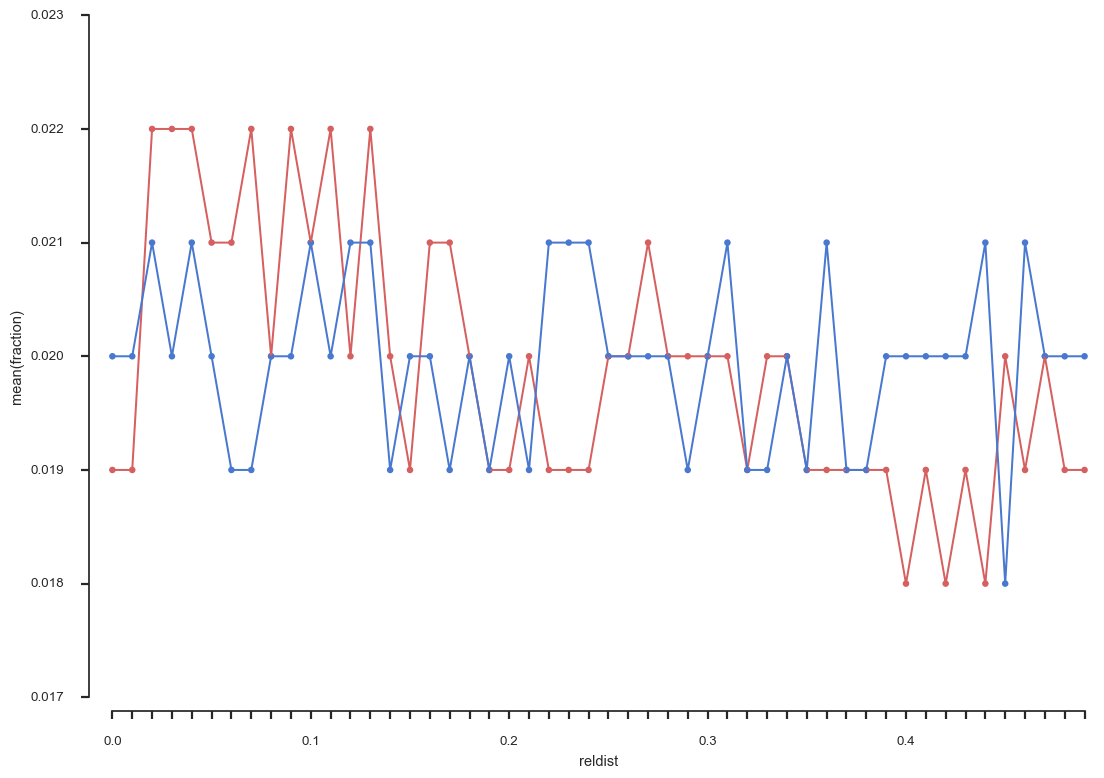

In [195]:
import numpy as np
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

#sns.set(style="white", palette="muted", color_codes=True)
sns.set(style="ticks", palette="muted", color_codes=True)
sns.set_context("poster", font_scale=0.6, rc={"lines.linewidth": 0.8})

g1 = sns.pointplot(x='reldist', y='fraction', data=df_reldist[0:50],  color='r')
g2 = sns.pointplot(x='reldist', y='fraction', data=df_reldist_random[0:50], color='b')

sns.despine(offset=10, trim=True)
#plot.set_yscale("log")
#df_reldist[['reldist','fraction']].plot()
for ind, label in enumerate(g1.get_xticklabels()):
    if ind % 10 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

## Densities

In [196]:
# density
# assuming expected number of MIR-enhancers as
# average genome-wide density of enhancers (enhancers/bp) * total bp length of all MIRs

def compute_expected_number(name1_bed_df, name2_bed_df, name1, name2):
    genome_size = 3095677412
    #enhancers_bed_df['size'] = enhancers_bed_df['end'] - enhancers_bed_df['start']
    name1_density = len(name1_bed_df) /  genome_size
    name2_bed_df['size'] = name2_bed_df['end'] - name2_bed_df['start']
    name2_len = name2_bed_df['size'].sum()
    print(name1, 'density =', name1_density, '(num of intervals)/(genome bp)')
    print(name2,'length =', name2_len, 'bp')
    print('Expected number of', name2, name1, '=', int(round(name1_density * name2_len)))

In [197]:
compute_expected_number(encode_bed_df, repeat_bed_df, 'K562 enhancers', 'Sine/MIR')

K562 enhancers density = 1.1878498663154635e-05 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR K562 enhancers = 1006


In [198]:
def infer_TSS_proximity(row):
    description = row['name']
    if 'Distal' in description:
        return 'Distal'
    if 'Proximal' in description:
        return 'Proximal'

In [199]:
encode_bed_df['TSS_proximity'] = encode_bed_df.apply(lambda r: infer_TSS_proximity(r), axis=1)

In [200]:
proximal_df = encode_bed_df.query("TSS_proximity == 'Proximal'")
distal_df = encode_bed_df.query("TSS_proximity == 'Distal'")

In [201]:
len(distal_df)

20000

In [202]:
len(proximal_df)

16772

In [203]:
compute_expected_number(distal_df, repeat_bed_df, "Distal enhancers", "Sine/MIR")

Distal enhancers density = 6.460621485453408e-06 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR Distal enhancers = 547


In [204]:
compute_expected_number(proximal_df, repeat_bed_df, "Proximal enhancers", "Sine/MIR")

Proximal enhancers density = 5.417877177701227e-06 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR Proximal enhancers = 459


In [205]:
genes_bed = BedTool("../download/genome/knownGene_hg19.bed")

In [206]:
genes_bed.count()

82960

In [207]:
genes_bed_df = genes_bed.to_dataframe()

In [208]:
chrom_list = ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chrX',
              'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
              'chr15', 'chr16', 'chr17', 'chr18', 'chr20', 'chrY', 'chr19',
              'chr22', 'chr21']

genes_bed_df = genes_bed_df.query("chrom in @chrom_list")

In [209]:
genes_bed_df['chrom'].unique()

array(['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8',
       'chr9', 'chrX', 'chrY', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14',
       'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21',
       'chr22'], dtype=object)

In [210]:
genes_bed = BedTool().from_dataframe(genes_bed_df)

In [211]:
genes_bed.count()

78807

In [212]:
compute_expected_number(genes_bed_df, repeat_bed_df, 'Genes', 'Sine/MIR')

Genes density = 2.5457109870206334e-05 (num of intervals)/(genome bp)
Sine/MIR length = 84720992 bp
Expected number of Sine/MIR Genes = 2157


In [213]:
# genic enhancers: enhancers in genic regions
genic_enhancers_bed = encode_bed.intersect(genes_bed, f=1, u=True)

In [214]:
genic_enhancers_bed.count()

16890

In [215]:
# genic non-enhancers: genic regions without enhancers
genic_non_enhancers_bed = genes_bed.subtract(genic_enhancers_bed, A=True)

In [216]:
genic_non_enhancers_bed.intersect(genic_enhancers_bed).count()

0

In [217]:
# non-genic enhancers: enhancers outside genic regions
non_genic_enhancers_bed = encode_bed.subtract(genes_bed, f=1, A=True)

In [218]:
non_genic_enhancers_bed.count()

19882

In [219]:
non_genic_enhancers_bed.count() + genic_enhancers_bed.count() == encode_bed.count()

True

In [220]:
# 200 bp regions around core of enhancers
enhancers_regions_bed = encode_bed_cores.slop(g=assembly_path, b=200)

In [221]:
enhancers_regions_bed.count()

36772

In [222]:
genes_bed_df['size'] = genes_bed_df.apply(lambda row: compute_size(row), axis=1)

In [223]:
genes_bed_df[['size']].quantile(np.arange(0,1,0.1))

,size
0.0,19.0
0.1,993.6
0.2,4083.0
0.3,8054.0
0.4,13047.0
0.5,20134.0
0.6,30029.2
0.7,44468.0
0.8,71447.4
0.9,133227.0


In [224]:
def compute_density_region(bed_in_region_df, region_df):
    region_size = region_df['size'].sum()
    bed_in_region_size = bed_in_region_df['size'].sum()
    
    return bed_in_region_size / region_size

In [225]:
repeat_reg1_df = repeat_bed.intersect(genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [226]:
repeat_reg2_df = repeat_bed.intersect(genic_non_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [227]:
repeat_reg3_df = repeat_bed.intersect(non_genic_enhancers_bed, f=1e-09, u=True).to_dataframe()

In [228]:
repeat_reg4_df = repeat_bed.intersect(enhancers_regions_bed, f=1e-09, u=True).to_dataframe()

In [229]:
reg1_df = genic_enhancers_bed.to_dataframe()
reg2_df = genic_non_enhancers_bed.to_dataframe()
reg3_df = non_genic_enhancers_bed.to_dataframe()
reg4_df = enhancers_regions_bed.to_dataframe()

reg1_df['size'] =  reg1_df.apply(lambda row: compute_size(row), axis=1)
reg2_df['size'] =  reg2_df.apply(lambda row: compute_size(row), axis=1)
reg3_df['size'] =  reg3_df.apply(lambda row: compute_size(row), axis=1)
reg4_df['size'] =  reg4_df.apply(lambda row: compute_size(row), axis=1)

repeat_reg1_df['size'] = repeat_reg1_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg2_df['size'] = repeat_reg2_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg3_df['size'] = repeat_reg3_df.apply(lambda row: compute_size(row), axis=1)
repeat_reg4_df['size'] = repeat_reg4_df.apply(lambda row: compute_size(row), axis=1)

In [230]:
d1 = compute_density_region(repeat_reg1_df,reg1_df)
d2 = compute_density_region(repeat_reg2_df,reg2_df)
d3 = compute_density_region(repeat_reg3_df,reg3_df)
d4 = compute_density_region(repeat_reg4_df,reg4_df)

print("density of MIR in genic enhancers", d1)
print("density of MIR in genic non enhancers", d2)
print("density of MIR in non genic enhancers", d3)
print("density of MIR in enhancer regions", d4)

sum_d = d1+d2+d3+d4

print("Normalized Ratios",d1/sum_d, d2/sum_d, d3/sum_d, d4/sum_d)


density of MIR in genic enhancers 0.04598915498118881
density of MIR in genic non enhancers 0.01114194824460957
density of MIR in non genic enhancers 0.03690546760384306
density of MIR in enhancer regions 0.0414527357772218
Normalized Ratios 0.3394301449532935 0.08223489014479296 0.27238657077881606 0.30594839412309754


## Closeness Profile

In [231]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
%matplotlib inline
import numpy as np
from joblib import Parallel, delayed
import multiprocessing

def compute_centers(closeness_df):
    closeness_df['centered_locus'] = round(
        (closeness_df['end'] - closeness_df['start'])/2 
        + closeness_df['start']).astype(int)

    closeness_df['close_centered_locus'] = round(
        (closeness_df['close_end'] - closeness_df['close_start'])/2 
        + closeness_df['close_start']).astype(int)

    closeness_df['centered_distance'] = closeness_df['close_centered_locus'] - closeness_df['centered_locus'] 
    return closeness_df

def compute_closeness_df(sorted_bed, sorted_bed_with):
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                     'close_chrom', 'close_start','close_end', 
                     'close_name', 'close_score', 'close_strand', 'distance']
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    return closeness_df

def build_closeness_df(bed, bed_with):
    
    closeness_columns = ['chrom', 'start', 'end', 'name', 'score', 'strand',
                         'close_chrom', 'close_start','close_end', 
                         'close_name', 'close_score', 'close_strand', 'distance']
    
    sorted_bed = bed.sort()
    sorted_bed_with = bed_with.sort()
    
    # real on real
    closeness = sorted_bed.closest(sorted_bed_with, D='a')
    closeness_df = closeness.to_dataframe()
    closeness_df.columns = closeness_columns
    closeness_df = compute_centers(closeness_df)
    
    return closeness_df

In [232]:
encode_bed = BedTool().from_dataframe(
    encode_bed.to_dataframe()[['chrom', 'start', 'end', 'name', 'score', 'strand']])

In [233]:
repeat_closeness_df = build_closeness_df(encode_bed, repeat_bed)

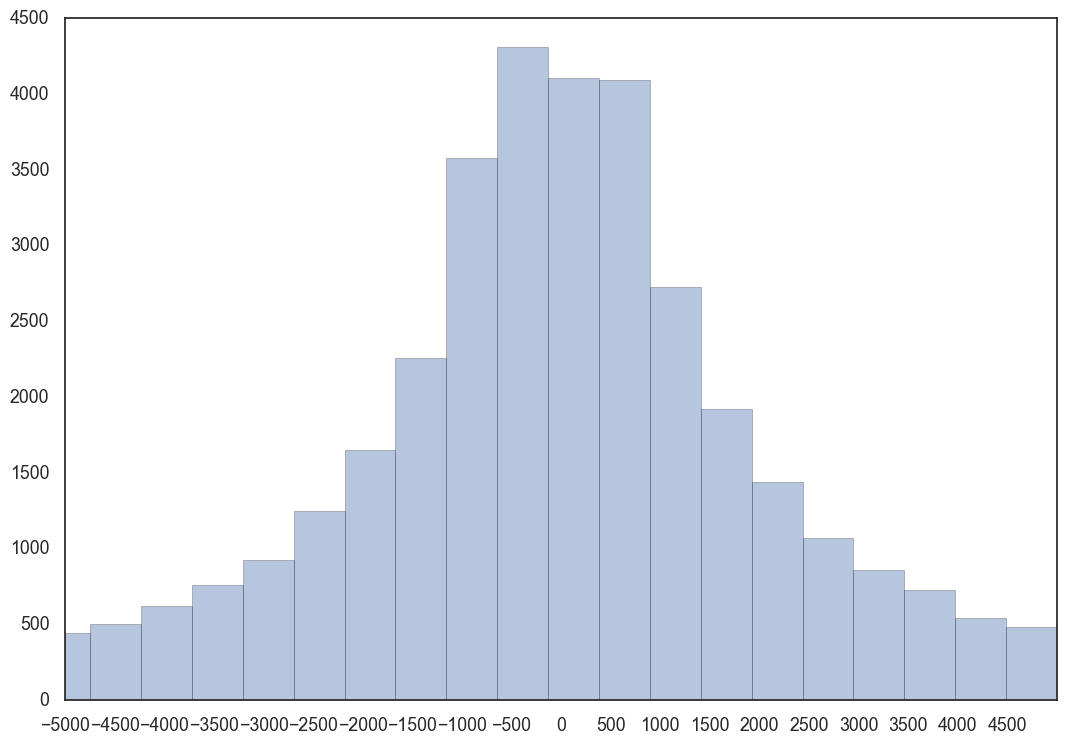

In [248]:
sns.set(style="white")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(repeat_closeness_df[['centered_distance']], kde=False, bins=1000)
g1.set_xlim(-5000, 5000)
g1.set_xticks(np.arange(-5000, 5000, 500))

In [289]:
centered_distance_distribution = repeat_closeness_df.query("centered_distance >=0")['centered_distance']

(0, 10000)

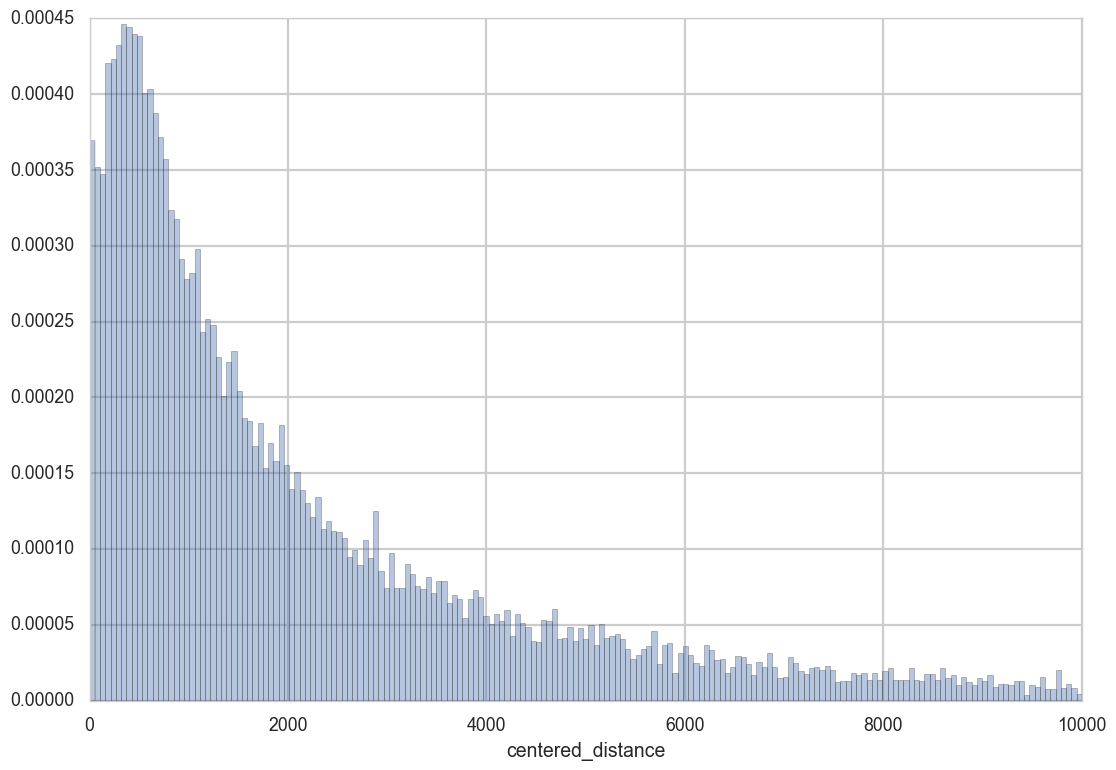

In [259]:
sns.set(style="whitegrid")
sns.set_context("poster", font_scale=0.8, rc={"lines.linewidth": 1})
g1 = sns.distplot(centered_distance_distribution, kde=False, fit=st.gamma, bins=5000)
g1.set_xlim(0, 10000)
#g1.set_xticks(np.arange(-5000, 5000, 500))

## Testing closeness distributions

In [349]:
values = [1,2,3,6,7,8]
hist, _ = np.histogram(values,bins=3)
hist

array([3, 0, 3])

In [359]:
freqs, _ = np.histogram(centered_distance_distribution, bins=1000)

In [365]:
len(freqs)

1000

In [367]:
# gamma distribution
fit_alpha, fit_loc, fit_beta = st.gamma.fit(freqs)
print(fit_alpha, fit_loc, fit_beta)

0.0498215506957 -1.2405492267e-27 1062.72329891


In [368]:
# F distribution
df1, df2, loc, scale = st.f.fit(freqs)
print(df1, df2, loc, scale)

1.14776233219 0.403967038543 -1.35340193888e-26 1.64593982698


In [378]:
# powerlognormal distribution
c, s, pw_loc, pw_scale = st.powerlognorm.fit(freqs)

In [427]:
# powerlaw distribution
pwl_a, pwl_loc, pwl_scale = st.powerlaw.fit(freqs)

In [428]:
r_gamma_data = st.gamma.rvs(a=fit_alpha, loc=fit_loc, scale=fit_beta, size=len(freqs))
r_f_data = st.f.rvs(df1, df2, loc=loc, scale=scale, size=len(freqs))
r_powerlognorm_data = st.powerlognorm.rvs(c=c, s=s, loc=pw_loc, scale=pw_scale, size=len(freqs))
r_powerlaw_data = st.powerlaw.rvs(a=pwl_a, loc=pwl_loc, scale=pwl_scale, size=len(freqs))

In [429]:
print(st.ks_2samp(freqs, freqs))
print(st.ks_2samp(freqs, r_f_data))
print(st.ks_2samp(freqs, r_gamma_data))
print(st.ks_2samp(freqs, r_powerlognorm_data))
print(st.ks_2samp(freqs, r_powerlaw_data))

Ks_2sampResult(statistic=0.0, pvalue=1.0)
Ks_2sampResult(statistic=0.78600000000000003, pvalue=9.7600597660232744e-272)
Ks_2sampResult(statistic=0.746, pvalue=7.9653646350067299e-245)
Ks_2sampResult(statistic=0.84699999999999998, pvalue=1.7513028645081635e-315)
Ks_2sampResult(statistic=0.78900000000000003, pvalue=8.2114393308896849e-274)


No distribution have been found consistent with the frequency distribution of closeness distances between core centers of enhancers and repeats.
An approach that can be used is to find out if the closeness distribution changes on different enhancers bio samples and on different repeats (Alu, MIR)

## An example

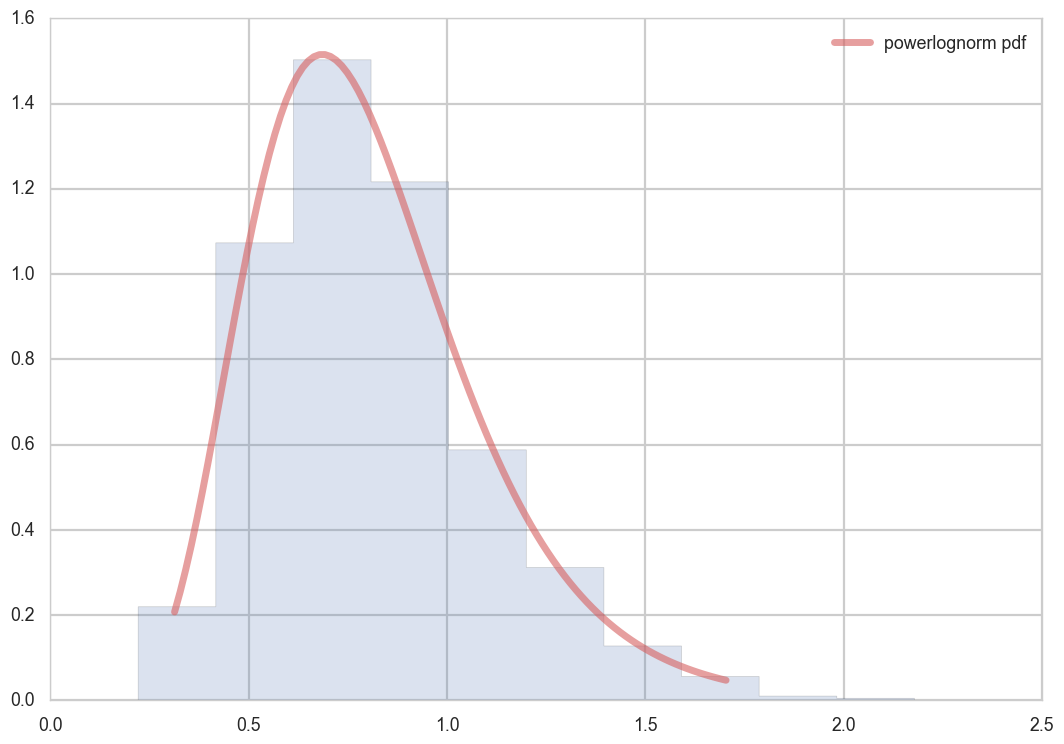

In [415]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c, s = 2.14139235301, 0.44639540782
mean, var, skew, kurt = st.powerlognorm.stats(c, s, moments='mvsk')
r = st.powerlognorm.rvs(c, s, size=1000)

x = np.linspace(st.powerlognorm.ppf(0.01, c, s), st.powerlognorm.ppf(0.99, c, s), 100)
ax.plot(x, st.powerlognorm.pdf(x, c, s), 'r-', lw=5, alpha=0.6, label='powerlognorm pdf')

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

plt.show()